<a href="#1-Definition" style="margin-left: 0px;">1 Definition</a>  
<a href="#2-Text-Preprocessing-(Text-Cleaning)" style="margin-left: 0px;">2 Text Preprocessing (Text Cleaning)</a>  
<a href="#3-Basic-Vectorization-Methods" style="margin-left: 0px;">3 Basic Vectorization Methods</a>  
<a href="#3.1-One-hot-Encoding" style="margin-left: 20px;">3.1 One-hot Encoding</a>  
<a href="#3.2-Count-Encoding-(Bag-of-Words,-BoW)" style="margin-left: 20px;">3.2 Count Encoding (Bag of Words, BoW)</a>  
<a href="#3.3-TF-IDF-(Term-Frequency-Inverse-Document-Frequency)" style="margin-left: 20px;">3.3 TF-IDF (Term Frequency - Inverse Document Frequency)</a>  
<a href="#4-Dense-Embeddings" style="margin-left: 0px;">4 Dense Embeddings</a>  
<a href="#4.1-Word2Vec-(CBOW,-Skip-Gram)" style="margin-left: 20px;">4.1 Word2Vec (CBOW, Skip-Gram)</a>  
<a href="#4.2-FastText" style="margin-left: 20px;">4.2 FastText</a>  
<a href="#4.3-GloVe-(Global-Vectors-for-Word-Representation)" style="margin-left: 20px;">4.3 GloVe (Global Vectors for Word Representation)</a>  
<a href="#5-Contextual-Embeddings-(Neural-Networks)" style="margin-left: 0px;">5 Contextual-Embeddings (Neural Networks)</a>  
<a href="#5.1-BERT-(Bidirectional-Encoder-Representations-from-Transformers)" style="margin-left: 20px;">5.1 BERT (Bidirectional Encoder Representations from Transformers)</a>  
<a href="#5.2-Other-Transformers" style="margin-left: 20px;">5.2 RoBERTa / DistilBERT / GPT / T5 / XLNet</a>  

### 1 Definition

**NLP (Natural Language Processing, обработка естественного языка)** — это область искусственного интеллекта (AI), которая занимается взаимодействием компьютеров и человеческого языка. Её цель — научить машины понимать, анализировать, генерировать и работать с текстом и речью

NLP решает задачи, связанные с языком:

Понимание текста: классификация (спам/не спам), анализ тональности (положительный/отрицательный отзыв).

Генерация текста: чат-боты, автоматическое суммирование статей.

Машинный перевод: Google Translate, DeepL.

Работа с речью: распознавание (ASR) и синтез речи (TTS)

**1. "Encoding" (Кодирование) — общий термин**   

Любое преобразование текста в числовой формат называется encoding (кодированием). Сюда входят:

One-Hot Encoding

Word Embeddings (Word2Vec, GloVe, FastText)

Современные методы (BERT, Transformer-ы)

**2. "Vectorization" (Векторизация) — синоним в NLP**  
Часто говорят "текстовая векторизация" (text vectorization), потому что на выходе получаются векторы (массивы чисел).

**3. "Embedding" (Вложение) — частный случай**  
Когда слова/фразы превращаются в плотные векторы (например, через Word2Vec или BERT), это называют word embedding (словесные вложения)

### 2 Text Preprocessing (Text Cleaning)

In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.DataFrame([["Hello, Hello, how are you?"], 
                     ["Hello, Hi, what are doing?"], 
                     ["What a surprise"]], 
                    columns=["text"])

data

,text
0,"Hello, Hello, how are you?"
1,"Hello, Hi, what are doing?"
2,What a surprise


In [3]:
import re

def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text)  # Удаляем пунктуацию
    return text.lower()                   # Приводим к нижнему регистру

data["cleaned_text"] = data["text"].apply(clean_text)

In [4]:
data

,text,cleaned_text
0,"Hello, Hello, how are you?",hello hello how are you
1,"Hello, Hi, what are doing?",hello hi what are doing
2,What a surprise,what a surprise


In [5]:
data["tokens"] = data["cleaned_text"].str.split()

In [6]:
data["tokens"]

0    [hello, hello, how, are, you]
1    [hello, hi, what, are, doing]
2              [what, a, surprise]
Name: tokens, dtype: object

### 3 Basic Vectorization Methods

Базовые методы векторизации

### 3.1 One-hot Encoding

One-Hot Encoding преобразует слова в бинарные векторы.

Каждый столбец — это уникальное слово из словаря.

1 — слово есть в тексте, 0 — отсутствует

In [7]:
from sklearn.feature_extraction.text import CountVectorizer

In [8]:
# One-Hot Encoding через CountVectorizer (без лишних предупреждений)
vectorizer = CountVectorizer(binary=True, tokenizer=lambda x: x.split(), token_pattern=None)
X = vectorizer.fit_transform(data["cleaned_text"])

# Результат в DataFrame
one_hot_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())
one_hot_df.insert(0, "original_text", data["text"])

one_hot_df

,original_text,a,are,doing,hello,hi,how,surprise,what,you
0,"Hello, Hello, how are you?",0,1,0,1,0,1,0,0,1
1,"Hello, Hi, what are doing?",0,1,1,1,1,0,0,1,0
2,What a surprise,1,0,0,0,0,0,1,1,0


### 3.2 Count Encoding (Bag of Words, BoW) 

Представление текста как вектора частот слов (или их наличия), игнорируя порядок слов.

In [9]:
# Count Encoding (учитываем частоту слов)
vectorizer = CountVectorizer()  # binary=False по умолчанию
X_counts = vectorizer.fit_transform(data["cleaned_text"])

# Преобразуем в DataFrame
count_df = pd.DataFrame(X_counts.toarray(), columns=vectorizer.get_feature_names_out())
count_df.insert(0, "original_text", data["text"])

count_df

,original_text,are,doing,hello,hi,how,surprise,what,you
0,"Hello, Hello, how are you?",1,0,2,0,1,0,0,1
1,"Hello, Hi, what are doing?",1,1,1,1,0,0,1,0
2,What a surprise,0,0,0,0,0,1,1,0


### 3.3 TF-IDF (Term Frequency-Inverse Document Frequency)

📌 **1. TF (Term Frequency) — частота термина**  
TF измеряет, как часто термин встречается в документе. Формула:

$$
\text{TF}(t, d) = \frac{f_{t,d}}{N_d}
$$

- $t$ — термин (слово)  
- $d$ — документ  
- $f_{t,d}$ — количество раз, когда термин $t$ встречается в документе $d$  
- $N_d$ — общее количество слов в документе $d$  

---

📌 **2. IDF (Inverse Document Frequency) — обратная частота документа**  
IDF измеряет, насколько редким является термин во всём корпусе документов. Формула:

$$
\text{IDF}(t) = \log \left( \frac{N}{1 + n_t} \right)
$$

- $N$ — общее количество документов в корпусе  
- $n_t$ — количество документов, в которых встречается термин $t$  
- Добавление $+1$ в знаменатель — сглаживание, чтобы избежать деления на ноль  

---

📌 **3. TF-IDF (комбинированная метрика)**  
Окончательная формула TF-IDF — это просто произведение TF и IDF:

$$
\text{TF-IDF}(t, d) = \text{TF}(t, d) \times \text{IDF}(t)
$$


### Пример на слове "hello"

📌 **Формула IDF с сглаживанием, используемая в `TfidfVectorizer` из sklearn:**

$$
\text{IDF}(t) = \log\left(\frac{1 + N}{1 + n_t}\right) + 1
$$

- $t$ — термин (слово)  
- $N$ — общее количество документов  
- $n_t$ — количество документов, в которых встречается термин $t$  
- $+1$ в числителе и знаменателе — сглаживание, чтобы избежать деления на ноль  
- $+1$ после логарифма — сдвиг для получения положительных значений


TF = 2/5  
IDF = log(3/(1+2))  

TF*IDF = (2/5)*(np.log((1+3)/(1+2))+1) = 0.515

In [10]:
(2/5)*(np.log((1+3)/(1+2))+1)

0.5150728289807124

А TfidfVectorizer ещё может нормировать векторы (например, **L2-нормализация** по строкам), из-за чего значение становится 0.687703

In [11]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [12]:
# Создаём TF-IDF векторизатор и обучаем его на очищенных текстах
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(data["cleaned_text"])

# Преобразуем матрицу в DataFrame для удобства просмотра
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

tfidf_df.insert(0, "original_text", data["text"])

# Вывод
tfidf_df

,original_text,are,doing,hello,hi,how,surprise,what,you
0,"Hello, Hello, how are you?",0.343851,0.00000,0.687703,0.00000,0.452123,0.000000,0.000000,0.452123
1,"Hello, Hi, what are doing?",0.393511,0.51742,0.393511,0.51742,0.000000,0.000000,0.393511,0.000000
2,What a surprise,0.000000,0.00000,0.000000,0.00000,0.000000,0.795961,0.605349,0.000000


### 4 Dense Embeddings

**Плотные эмбеддинги**

Плотные эмбеддинги (Dense Embeddings) — это числовые представления слов, предложений или документов в виде векторов фиксированной длины, где почти все элементы вектора — ненулевые и содержат осмысленные значения. Они противопоставляются разреженным представлениям (например, One-Hot Encoding или TF-IDF), где большинство элементов — нули

### 4.1 Word2Vec (CBOW, Skip-Gram)

https://www.youtube.com/watch?v=WbtQzAvhnRI&ab_channel=DeepLearningSchool

У нас есть окно размером 5, которое мы двигаем по тексту и для каждого центральнго слова окна предсказываем его соседей (2 слева и 2 справа)

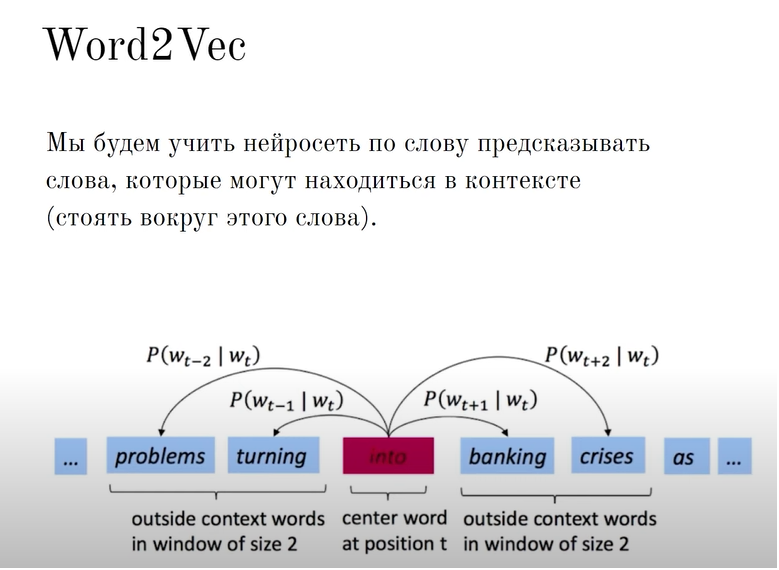

#### Задача:
1) Задача классификации  
2) Количество классов - размер словаря n  
3) Вход - слово, выход - n значений, распределение вероятности соседа-слова в словаре    
4) Лосс ф-я - кросс-энтропия между распределением, выданным сетью и верным распределением (one-hot вектором)  
распределение выданное сетью: [0.03, 0.53,0.25...,0.34, 0.17]   
one-hot vector: [0,1,0...0,0]  

#### Общая схема:

1) Входной слой содержит n нейронов, где n - размер словаря, на вход принимает One-hot вектор слова,   

Словарь это количество всех слов из текста и если у нас, например, из 10000 слов слово *into* находится на 334 месте, значит one-hot вектор этого слова будет все нули, кроме 334-ой позиции, там будет 1  

2) k - размер скрытого слоя, который мы задаём самостоятельно, **у скрытого слоя нет ф-ии активации**    
3) One-hot вектор слова умножается на матрицу **A**, получаем значение скрытого слоя, далее этот вектор скрытого слоя умножаем на матрицу **B**  

4) Выход будет размером n и выдавать будет распределение на все слова в словаре.   

В выходном векторе мы будем получать большие вероятности на месте, где слово стоит в контектсе входного слова и маленькие вероятности, напротив слов, которые не могут стоять в контексте входного слова. Как пример у нас входное слово **into** и вокруг него 4 слова.  

Сначала мы подаём в качестве target слово problems (1-ое слово из 4-х соседей), потом слово turning и так далее, то есть получаем для данного окна, для центрального слова **into** мы по очереди обучаем нейросеть с 4 разницами target (соседями центральнго слова)  
5)

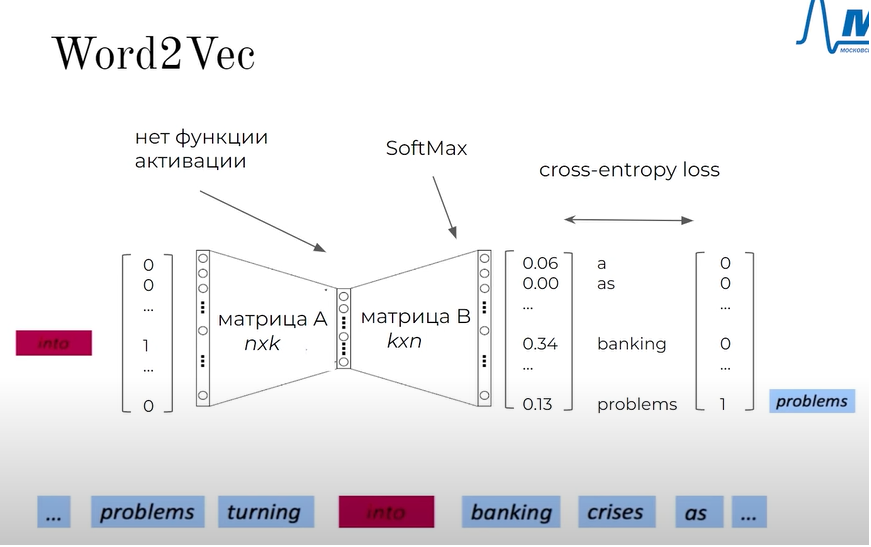

Та же самая схема, но немного по-другому перерисованная

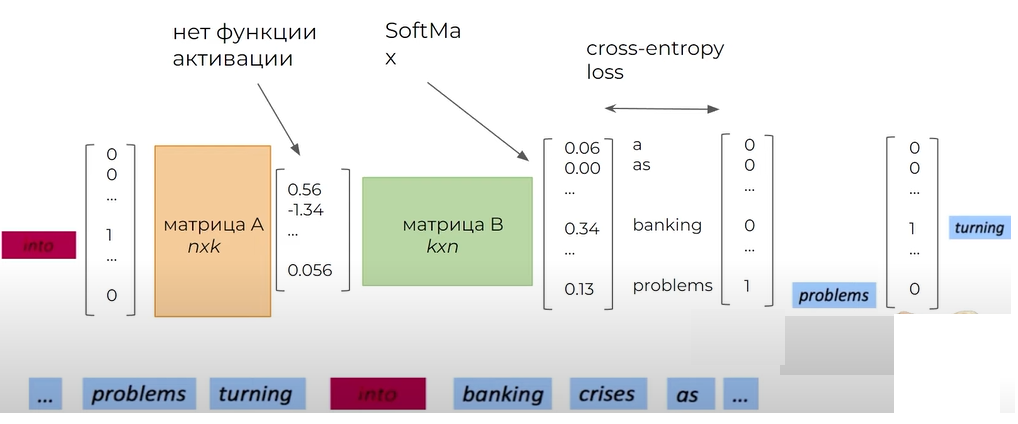

**!!!**  

В итоге как получаем вероятность???:  

1) умножаем One-hot_encoding слова into на матрицу A  
2) так как всего лишь одна единичка, остальные 0, то получаем что просто берём i-ую строчку матрицы A (i это место единички, то есть место слова into в словаре)  
3) получаем вектор сркытого слоя в котором нет ф-ии активации  
4) умножаем эту i-ую строчку A на j-ый столбец матрицы B (j - место problems в словаре) и получаем **0.34** - вероятность то что **problems** сосед слова **into**   

**Строки матрицы A и столбцы матрицы B - это эмбединги слов из словаря**  

Можно брать и то и то в качестве эмбеддингов  

#### Чтобы посчитать схожесть вмежду двумя словами, можно посчитать косинусное расстояние между их векторами

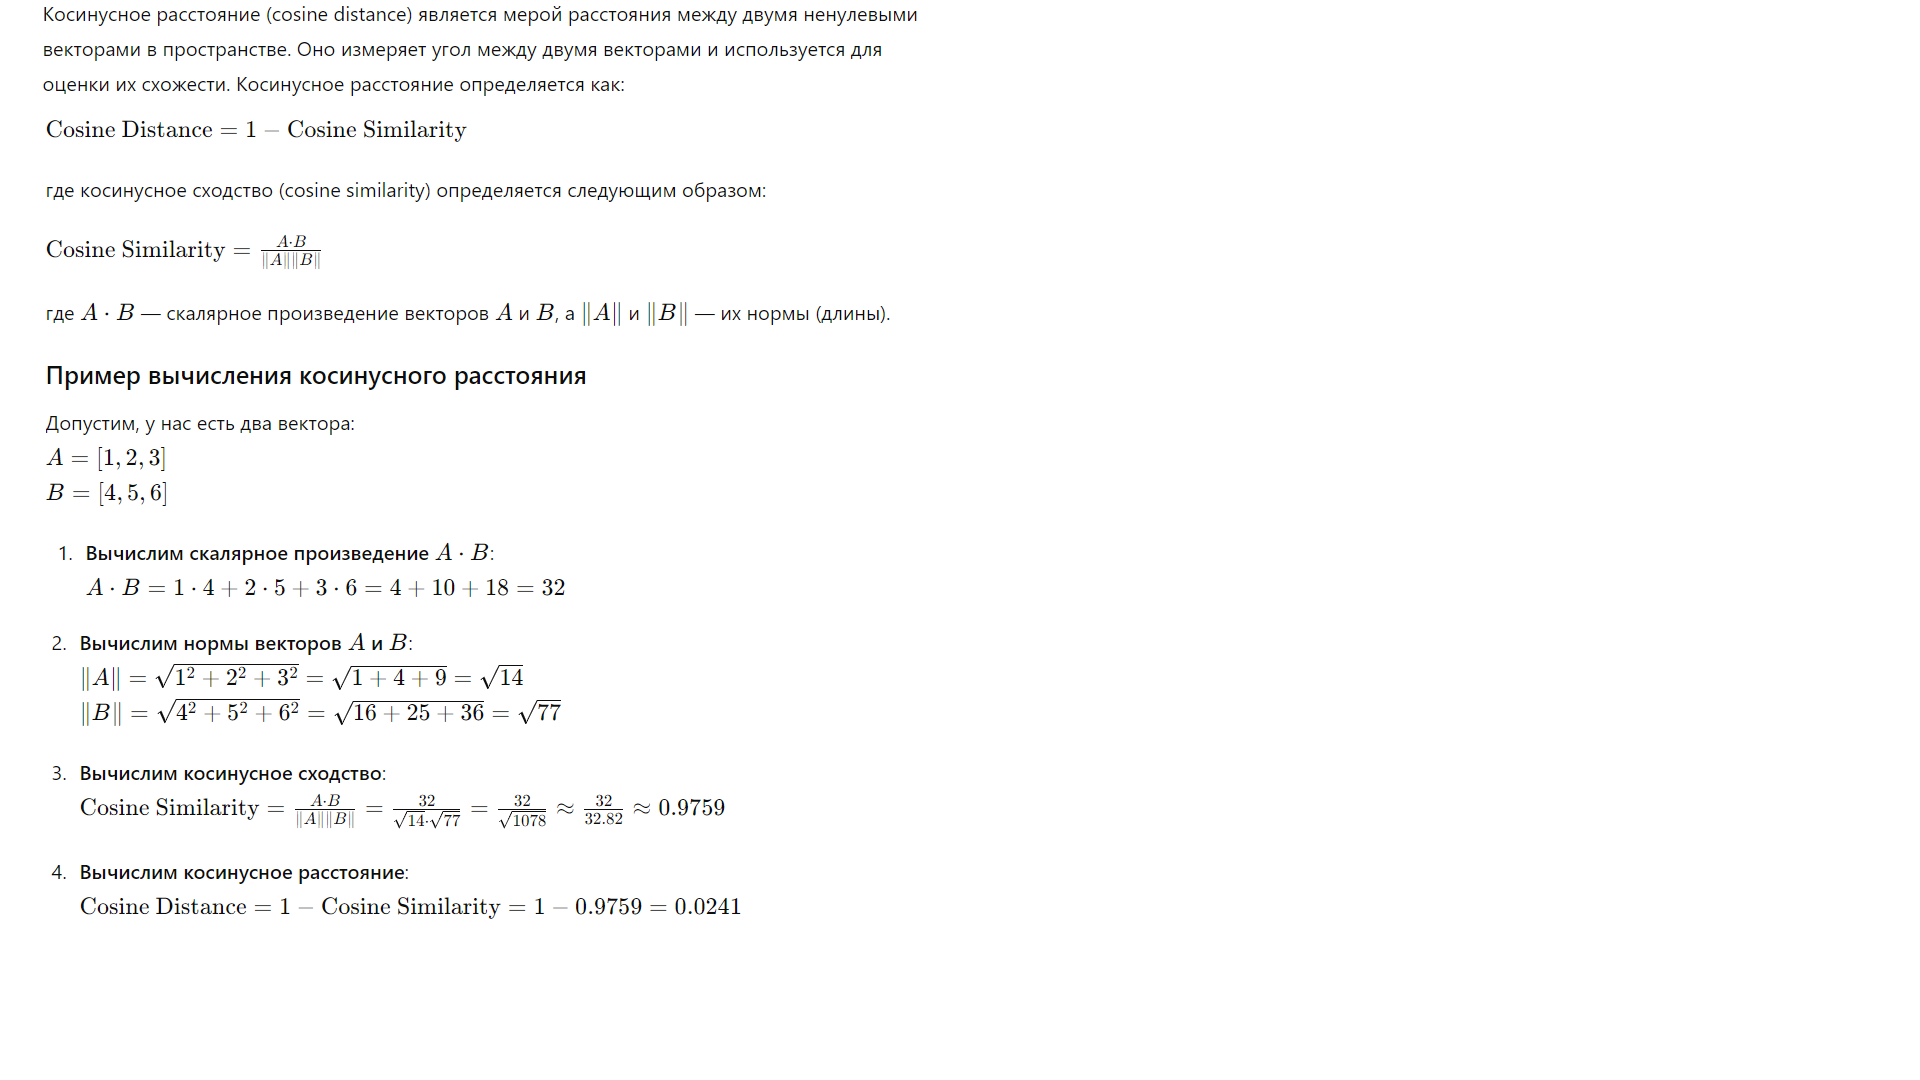

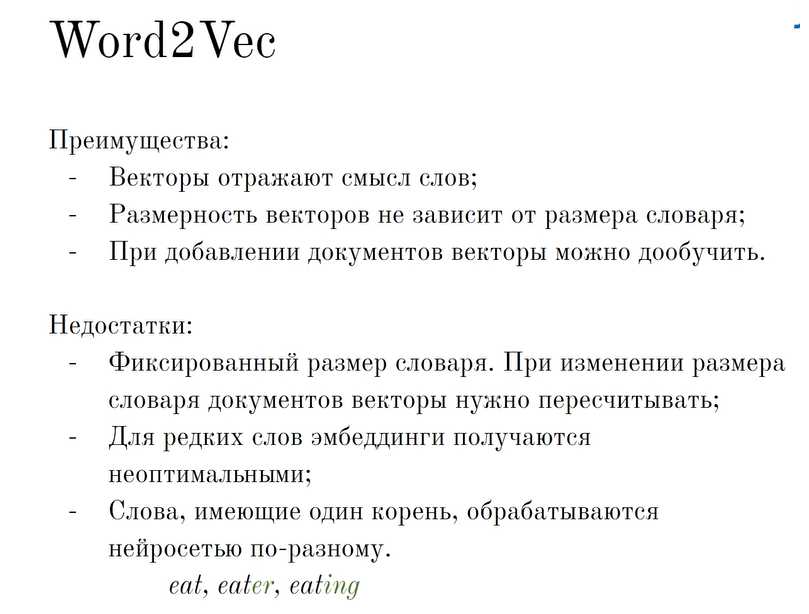

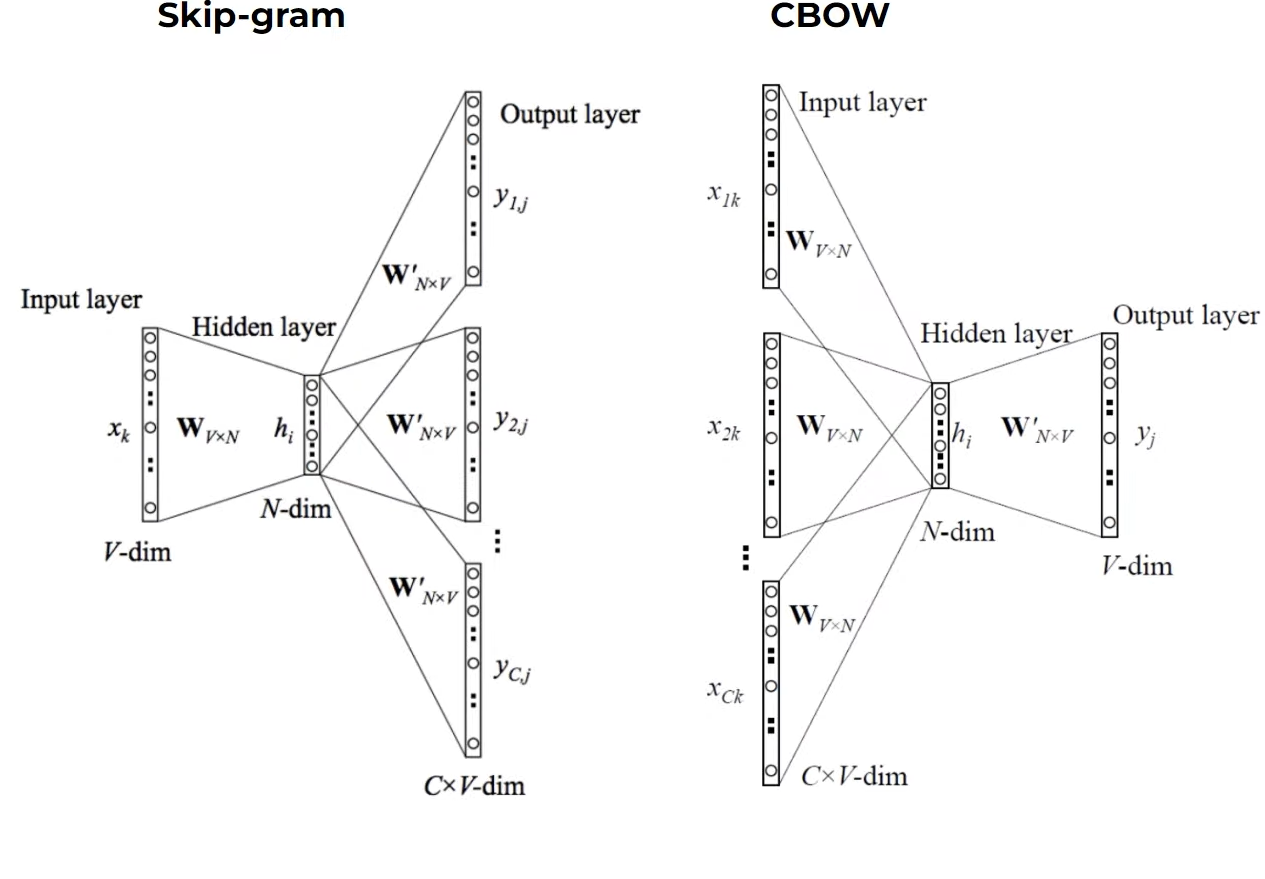

In [13]:
from gensim.models import Word2Vec

In [14]:
# Обучаем Word2Vec
model_w2v = Word2Vec(data["tokens"], vector_size=100, window=5, min_count=1, workers=4)
# vector_size = размер вектора, window = размер окна контекста

# Получаем вектор одного слова
vector_hello = model_w2v.wv["hello"]  # Вектор размерности 100
print("Вектор 'hello':", vector_hello[:5])  # Покажем первые 5 значений

# Визуализация похожих слов
similar_words = model_w2v.wv.most_similar("hello", topn=3)
print("Похожие на 'hello':", similar_words)

Вектор 'hello': [-0.00053623  0.00023643  0.00510335  0.00900927 -0.00930295]
Похожие на 'hello': [('you', 0.09291721880435944), ('how', 0.02704671397805214), ('hi', 0.016134677454829216)]


### 4.2 FastText

1) Слова делим на n-граммы 

2) Будем строить Word2Vec не для отдельных слов, а для частей слов  

3) Суммируем вектора n-грамм для слова  

Получаем что хорошо работаем с однокоренными словами так как корень будет хорошо отражать смысл и если слово редкое, но оно однокоренное популярному слову, оно тоже будет иметь хорошее представление

**BPI** - хорошо делит слова на части, можно его использовать вместо n-грамм

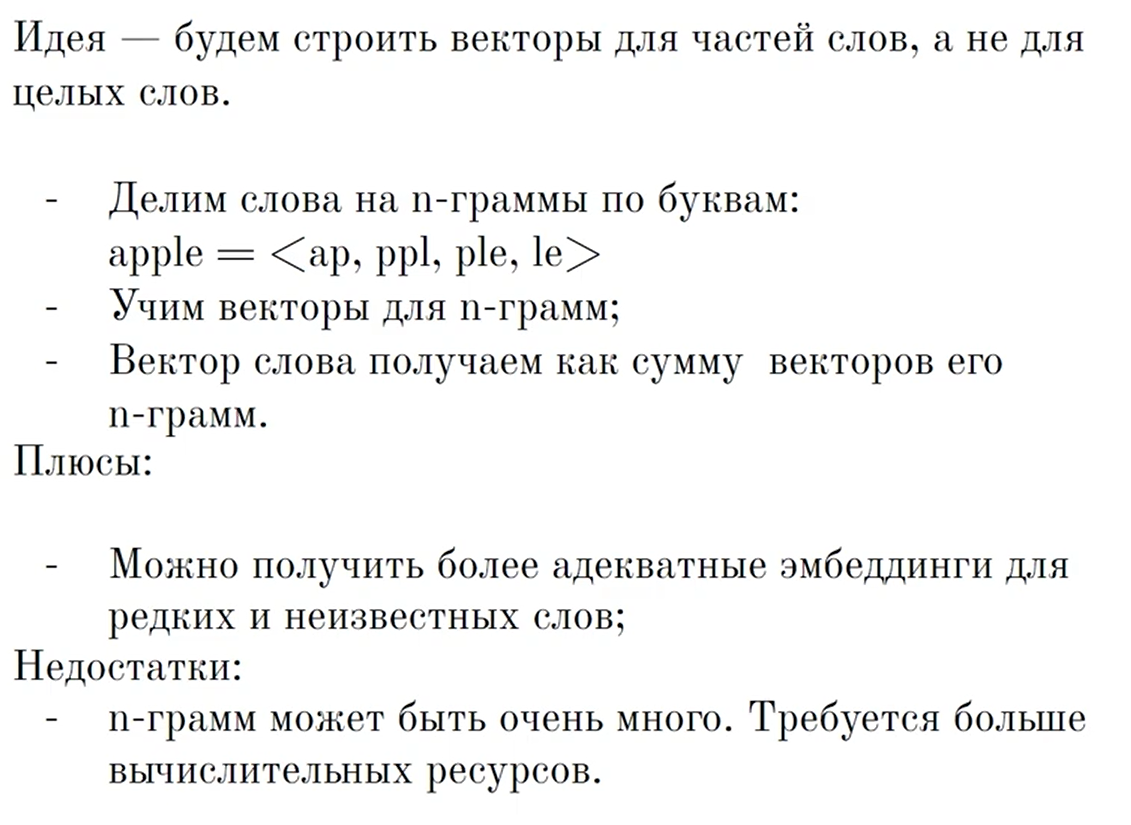

### 4.3 GloVe (Global Vectors for Word Representation)

**Основная идея**  

Комбинирует:  

Локальный контекст (как в Word2Vec).  

Глобальную статистику (частоту совместных встречаемостей слов во всём корпусе)  

GloVe решает задачу:

У нас есть глобальная статистика слов, например:  

X["coffee"]["cup"] = 4521    
X["coffee"]["drink"] = 3890    
X["coffee"]["like"] = 1200    

$$
w_i \cdot w_j + b_i + b_j \approx \log(X_{ij})
$$

где:
- $w_i$ — вектор слова,
- $b_i$ — смещение (bias),
- $X_{ij}$ — значение из матрицы.

**в реальной задаче с GloVe используется не просто логарифм значений, а более сложная функция потерь для оптимизации векторов слов**  

Пример для слов "like" и "coffee":

Если в матрице $X_{\text{like, coffee}} = 1$, то:

$$
w_{\text{like}} \cdot w_{\text{coffee}} + b_{\text{like}} + b_{\text{coffee}} \approx \log(1) = 0
$$

Если $X_{\text{like, coffee}} = 4521$ (часто встречаются вместе), то:

$$
w_{\text{like}} \cdot w_{\text{coffee}} \approx \log(4521) \approx 8.416
$$


### GloVe vs Word2Vec: Ключевые отличия

| Критерий                     | **Word2Vec (Skip-gram/CBOW)**            | **GloVe**                             |
|------------------------------|------------------------------------------|---------------------------------------|
| **Основной принцип**          | Предсказывает контекст слова (или наоборот) | Анализирует глобальную матрицу совместных встречаемостей слов |
| **Обучение**                  | Итеративно, через окно контекста        | Оптимизирует векторы под готовую матрицу статистики |
| **Данные**                    | Локальный контекст (окно слов)          | Вся корпусная статистика             |
| **Скорость**                  | Быстрее на больших корпусах             | Медленнее из-за построения матрицы   |
| **Память**                    | Экономит память                         | Требует много RAM для матрицы        |


### 5 Contextual-Embeddings (Neural Networks)

Контекстуальные эмбеддинги (нейросетевые модели)

Контекстуальные эмбеддинги — это векторные представления слов, которые учитывают их контекст в предложении. В отличие от классических методов (Word2Vec, GloVe), где каждое слово имеет один фиксированный вектор, контекстуальные эмбеддинги меняются в зависимости от окружения слова.

### 1. Чем отличаются от Word2Vec/GloVe?

| Метод           | Фиксированный вектор? | Учитывает контекст? | Пример для слова "банк"                          |
|-----------------|-----------------------|---------------------|--------------------------------------------------|
| Word2Vec/GloVe  | Да                    | ❌ Нет               | Один вектор для всех значений ("банк реки" = "банк данных") |
| Контекстуальные| ❌ Нет                 | ✅ Да                | Разные векторы для "деньги в банке" и "сидеть на берегу банка" |


### 2. Как работают контекстуальные эмбеддинги?

Нейросетевая модель (например, BERT, ELMo, GPT) анализирует всё предложение.

Для каждого слова вычисляется вектор, который зависит от:

Самого слова.

Его позиции в тексте.

Окружающих слов.

Пример для BERT:

Вход: "Клиент положил деньги в банк" → "банк" = вектор [0.1, -0.3, 0.8, ...].

Вход: "Рыбаки сидели на берегу банка" → "банк" = вектор [-0.2, 0.5, 0.4, ...].

### 5.1 BERT (Bidirectional Encoder Representations from Transformers)

#### 1. Основная идея
BERT — это нейросетевая модель для обработки естественного языка (NLP), которая:

Анализирует текст в обе стороны (слева-направо и справа-налево) одновременно.

Создает контекстуальные эмбеддинги — векторные представления слов, зависящие от их окружения.

Пример:
Для слова "банк" в предложениях:

"Он положил деньги в банк" → вектор ближе к "финансы".

"Он сидел на берегу банка" → вектор ближе к "река".

#### 2. Архитектура
Основана на трансформерах (механизм внимания — self-attention).

Состоит из 12–24 слоев (в зависимости от версии).

Каждый слой анализирует связи между всеми словами в предложении.

Главное отличие от GPT:

BERT — двунаправленный (видит контекст слева и справа).

GPT — односторонний (только слева направо).

#### 3. Обучение BERT
Перед обучением на конкретной задаче BERT проходит две предварительные задачи (pre-training):

Masked Language Model (MLM)

15% слов в тексте заменяются на [MASK].

Модель учится предсказывать замаскированные слова.
Пример:
"Кот [MASK] на диван" → модель предсказывает "залез".

Next Sentence Prediction (NSP)

Модель определяет, следует ли предложение B за предложением A.
Пример:

A: "На улице дождь." B: "Он взял зонт." → True.

A: "На улице дождь." B: "Он купил мороженое." → False.

In [15]:
from transformers import BertTokenizer, BertModel
import torch

In [16]:
# Загружаем предобученную модель и токенизатор
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')

#### 1) Разбил предложение на токены (слова/части слов).

Здесь все слова есть в словаре BERT, поэтому они не разбиваются дальше:  
["[CLS]", "hello", "hello", "how", "are", "you", "[SEP]"]    

Слово: "surprise" → может превратиться в ["sur", "##prise"], если "surprise" нет в словаре  

#### 2) Добавил служебные токены [CLS] (начало) и [SEP] (конец).  

[CLS] — начало текста (используется для классификации).  

[SEP] — разделитель предложений  

Каждому токену присваивается числовой ID из словаря BERT  

{"[CLS]": 101, "hello": 7592, "how": 2129, "are": 2024, "you": 2017, "[SEP]": 102}  

#### 3) Создание эмбеддингов  

3.1) Каждый ID (например, 7592 для "hello") превращается в вектор размерности 768 (для bert-base)    

Каждому токену (например, "hello") ставится в соответствие фиксированный вектор из таблицы эмбеддингов BERT.  

Вектор для "hello": V_token = [0.1, -0.3, 0.8, ..., 0.2] (из словаря модели).  

Это чисто семантическое представление слова, без учёта позиции  

3.2) Добавляется информация о позиции слова в предложении    
 
BERT добавляет к каждому токену специальный вектор позиции, который:  

Заранее обучен (как и токенные эмбеддинги).  

Зависит только от позиции слова в предложении (1, 2, 3, ...).  

Пример для "hello" на позиции 1:  

Позиционный эмбеддинг для позиции 1: V_pos =[0.9, 0.2, ..., -0.1]  


 
3.3) V_input = V_token + V_pos = [1.0, -0.1, ..., 0.1]  

Этот суммарный вектор подаётся в первый слой BERT  


#### 4) Пропустил текст через 12 слоёв трансформера.  

#### 5) Усреднил векторы всех токентов (или взял вектор [CLS]) — вы выбрали усреднение.    

Вы использовали усреднение всех токенов (кроме [CLS] и [SEP]):  

Берутся векторы всех слов:  

"hello": [0.1, -0.3, ..., 0.2]  

"how": [0.4, 0.6, ..., -0.1]

...  

Усредняются по каждому из 768 измерений:  
Итоговый вектор: [0.2, 0.1, ..., 0.05]  

In [17]:
def get_bert_embeddings(tokens):
    # Преобразуем токены в строку (BERT работает с текстом)
    text = " ".join(tokens)
    
    # Токенизируем и преобразуем в тензоры PyTorch
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    
    # Получаем эмбеддинги
    with torch.no_grad():
        outputs = model(**inputs)
    
    # Берем эмбеддинги последнего скрытого слоя
    embeddings = outputs.last_hidden_state
    
    # Усредняем эмбеддинги по всем токенам предложения
    return embeddings.mean(dim=1).squeeze().numpy()

# Применяем ко всем строкам
data["bert_embeddings"] = data["tokens"].apply(get_bert_embeddings)

In [18]:
data

,text,cleaned_text,tokens,bert_embeddings
0,"Hello, Hello, how are you?",hello hello how are you,"[hello, hello, how, are, you]","[-0.068072796, -0.26475495, 0.38189462, -0.518..."
1,"Hello, Hi, what are doing?",hello hi what are doing,"[hello, hi, what, are, doing]","[0.3255823, 0.037610393, 0.5630199, -0.1297531..."
2,What a surprise,what a surprise,"[what, a, surprise]","[-0.21258399, -0.10813363, -0.13078192, 0.1824..."


### Получаю эмбеддинг (векторное представление) предложения, созданный моделью BERT

In [19]:
len(data["bert_embeddings"].iloc[0])

768

### 5.2 Other Transformers 

**RoBERTa / DistilBERT / GPT / T5 / XLNet**

#### 1. RoBERTa  
**Что:** Улучшенный BERT от Facebook.  

**Чем отличается:**
- Удалена задача NSP (только MLM).
- Обучается на больших данных и дольше.
- Динамическое маскирование токенов.

**Когда использовать:** Если BERT недостаточно точен.

---

#### 2. DistilBERT  
**Что:** Упрощённая (дистиллированная) версия BERT.  

**Чем отличается:**
- В 2 раза меньше параметров.
- Быстрее, но чуть хуже качество.
- Сохраняет ~95% точности BERT.

**Когда использовать:** Для экономии ресурсов (CPU, мобильные устройства).

---

#### 3. GPT (Generative Pre-trained Transformer)  
**Что:** Модель для генерации текста (от OpenAI).  

**Чем отличается:**
- Односторонний контекст (только слева направо).
- Нет [CLS]/[SEP] — работает с последовательностями.

**Лучше всего для:** чат-ботов, дополнения текста.  

**Когда использовать:** Если нужно генерировать текст (например, ChatGPT).

---

#### 4. T5 (Text-to-Text Transfer Transformer)  
**Что:** Универсальная модель от Google (текст → текст).  

**Чем отличается:**
- Все задачи формулирует как "входной текст → выходной текст".
- Может делать: перевод, классификацию, суммирование.

**Когда использовать:** Для многозадачности (одна модель для всего).

---

#### 5. XLNet  
**Что:** Гибрид BERT и GPT.  

**Чем отличается:**
- Перестановочное обучение (учёт всех позиций, но без маскирования).
- Лучше работает с длинными текстами.

**Когда использовать:** Если важно учитывать длинные зависимости.

---

### Итоговая таблица

| Модель      | Тип        | Особенность                                        | Лучше всего для           |
|-------------|------------|---------------------------------------------------|---------------------------|
| RoBERTa     | Двунаправл.| Больше данных, нет NSP                            | Точная классификация      |
| DistilBERT  | Двунаправл.| Компактная версия BERT                            | Быстрые приложения        |
| GPT         | Односторон.| Генерация текста                                  | Чат-боты, дополнение      |
| T5          | Универсальная | Все задачи как "текст → текст"                   | Многозадачность           |
| XLNet       | Гибрид     | Учёт всех позиций без маскирования                | Длинные тексты            |

---

### Выбирайте модель под задачу:

- Классификация? → RoBERTa/DistilBERT.
- Генерация? → GPT.
- Универсальность? → T5.
- Длинные тексты? → XLNet.
